In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
pd.options.display.max_columns = 100

In [3]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#Calculating % of Nan values in training dataset
train_null = pd.DataFrame(train.isnull().sum()).rename(columns={0:'Total'})
train_null['NaN %'] = round(100*(train_null['Total']/train.shape[0]),2)
Nulls_train = train_null[train_null['Total']>0].sort_values('NaN %', ascending=False)
Nulls_train

,Total,NaN %
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55
GarageQual,81,5.55


Removing the following features for 2 reasons: 
1. We do not necesarrily require these. 
2. They have high number of missing values, handling them will still hamper the prediction model

●	PoolQC: Pool quality
●	MiscFeature: Miscellaneous feature not covered in other categories
●	Alley: Type of alley access
●	Fence: Fence quality
●	FireplaceQu: Fireplace quality


In [6]:
#Removing the columns which have more than 40% null values
train = train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1)

Below are the features with blank/Nan/ null values


●	GarageType: Garage location
●	GarageYrBlt: Year garage was built
●	GarageQual: Garage quality
●	GarageCond: Garage condition
●	BsmtExposure: Walkout or garden level basement walls
●	BsmtFinType2: Quality of second finished area (if present)
●	BsmtFinType1: Quality of basement finished area
●	BsmtCond: General condition of the basement
●	BsmtQual: Height of the basement
●	MasVnrArea: Masonry veneer area in square feet(External wall appearance)
●	MasVnrType: Masonry veneer type
●	Electrical: Electrical system

### Handeling missing values

In [7]:
NaN_Objects = ['BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
Nan_Int = ['MasVnrArea', 'GarageYrBlt', 'LotFrontage']

for col in NaN_Objects:
    train[col].fillna(value='No', inplace=True)
    
for col1 in Nan_Int:
    train[col1].fillna(value=0, inplace=True)

In [8]:
#'BsmtExposure' which already has a 'No' meaning no exposure for the basement. 
#To maintain consistency, we will first change the No to None for this column and then impute the NaN's with 'No'.

train.loc[train['BsmtExposure']=='No','BsmtExposure'] = 'None'
train['BsmtExposure'].fillna(value='No', inplace=True)

In [9]:
# Total houses whose Year build is not the same as Garage built year
len(train.loc[train['GarageYrBlt']!=train['YearBuilt'],'GarageYrBlt'])

371

In [10]:
#We can see that out of 1460 houses only 190 houses have different garage built year. 
#We can simply replace the 'YearBuilt' value in the Garagebuilt for the blank/null values.
train.loc[train['GarageYrBlt']==0,'GarageYrBlt'] = train[train['GarageYrBlt']==0]['YearBuilt']
train[train['GarageYrBlt']==0]['GarageYrBlt']

Series([], Name: GarageYrBlt, dtype: float64)

In [11]:
train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

## Data Analysis

In [12]:
#Differentiating and grouping columns by categorical and numerical values

numerical_dtypes = ['int','int32', 'int64', 'float32', 'float64']
#numerical_columns = train.select_dtypes(include=numerical_dtypes)
categorical_columns = train.select_dtypes(include=['object'])

In [13]:
categorical_columns.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [14]:
#Assigning feautres as per their contribution in house values

nominal = ['LandContour','RoofStyle', 'RoofMatl','Condition1','Condition2',
                   'LotConfig','BldgType','Exterior1st','Exterior2nd','MasVnrType',
                  'Foundation','BsmtFinType1', 'BsmtFinType2','Heating','HeatingQC','Electrical','GarageType',
                  'SaleType', 'SaleCondition','Neighborhood']

ordinal = ['MSZoning','Street','LotShape','Utilities','LandSlope','HouseStyle','ExterQual','ExterCond',
                  'BsmtQual', 'BsmtCond', 'BsmtExposure','CentralAir','KitchenQual','Functional',
                  'GarageFinish','GarageQual','GarageCond','PavedDrive']

In [15]:
numerical_columns = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt','Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
              'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
              'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
              'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
              'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
              'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
              'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

target = 'SalePrice'

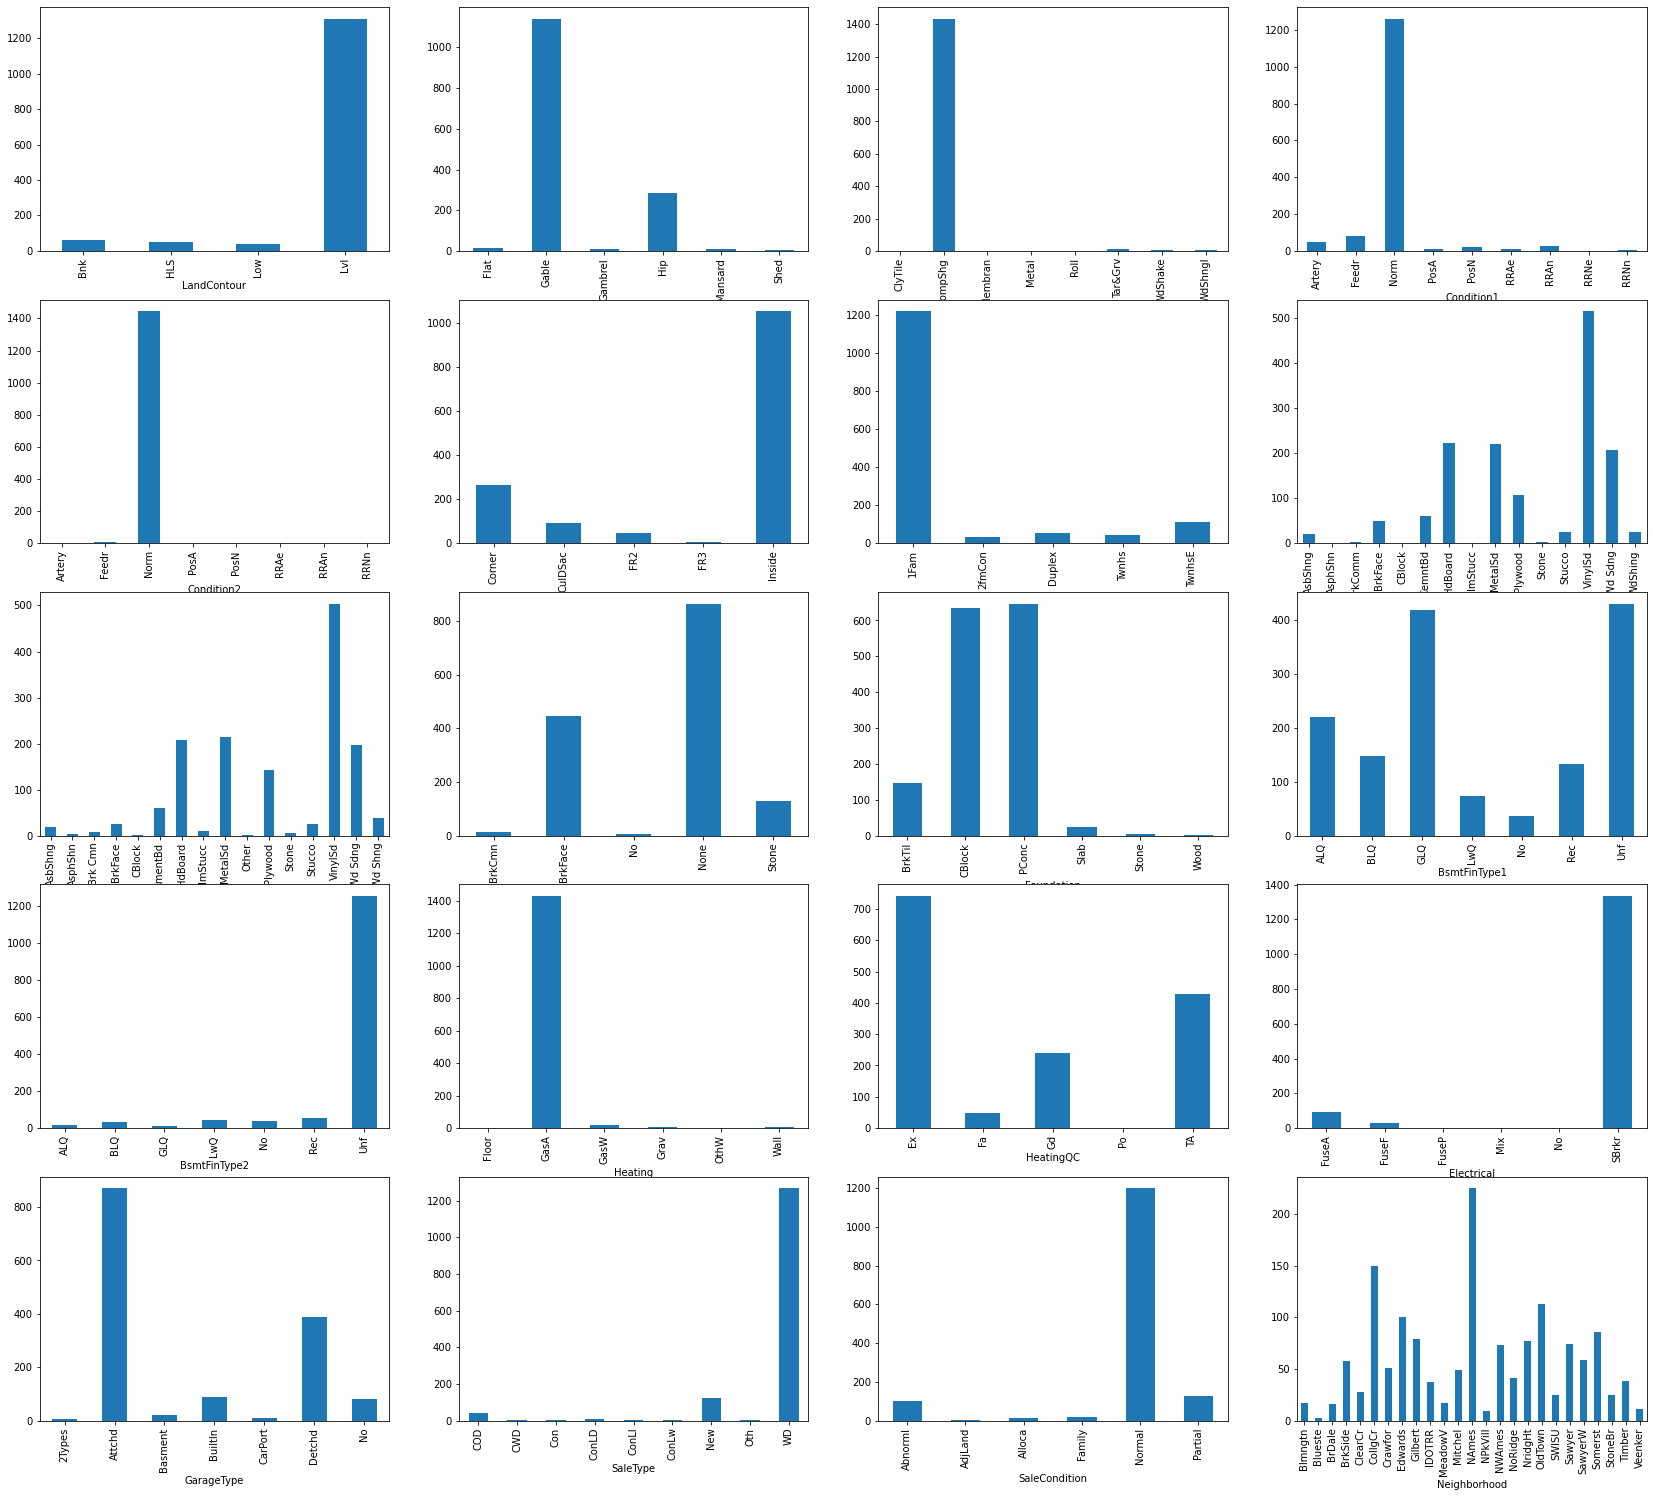

In [16]:
# plotting Nominal Columns
rows = 5
cols = 4
plt.figure(figsize=(cols*7.2,rows*5.2))
i=0 
for row in range(rows):
    for col in range(cols):
        index = cols*row+col
        plt.subplot(rows,cols,index+1)
        train.groupby(nominal[i]).size().plot(kind='bar',)
        i+=1

### Numerical columns analysis

In [17]:
uniqueValCount = train[numerical_columns].nunique()
uniqueValCount

LotFrontage       111
MasVnrArea        327
GarageYrBlt       102
Id               1460
MSSubClass         15
LotArea          1073
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
BsmtFinSF1        637
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBath        4
BsmtHalfBath        3
FullBath            4
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
TotRmsAbvGrd       12
Fireplaces          4
GarageCars          5
GarageArea        441
WoodDeckSF        274
OpenPorchSF       202
EnclosedPorch     120
3SsnPorch          20
ScreenPorch        76
PoolArea            8
MiscVal            21
MoSold             12
YrSold              5
dtype: int64

In [18]:
uniqueValCount[uniqueValCount<50].sort_values(ascending=False)


LowQualFinSF    24
MiscVal         21
3SsnPorch       20
MSSubClass      15
MoSold          12
TotRmsAbvGrd    12
OverallQual     10
OverallCond      9
PoolArea         8
BedroomAbvGr     8
GarageCars       5
YrSold           5
Fireplaces       4
FullBath         4
BsmtFullBath     4
KitchenAbvGr     4
HalfBath         3
BsmtHalfBath     3
dtype: int64

#### Distribution of Numerical Columns that have Unique value count < 50

In [19]:
uniqueValCount[uniqueValCount<50].sort_values(ascending=False).index

Index(['LowQualFinSF', 'MiscVal', '3SsnPorch', 'MSSubClass', 'MoSold',
       'TotRmsAbvGrd', 'OverallQual', 'OverallCond', 'PoolArea',
       'BedroomAbvGr', 'GarageCars', 'YrSold', 'Fireplaces', 'FullBath',
       'BsmtFullBath', 'KitchenAbvGr', 'HalfBath', 'BsmtHalfBath'],
      dtype='object')

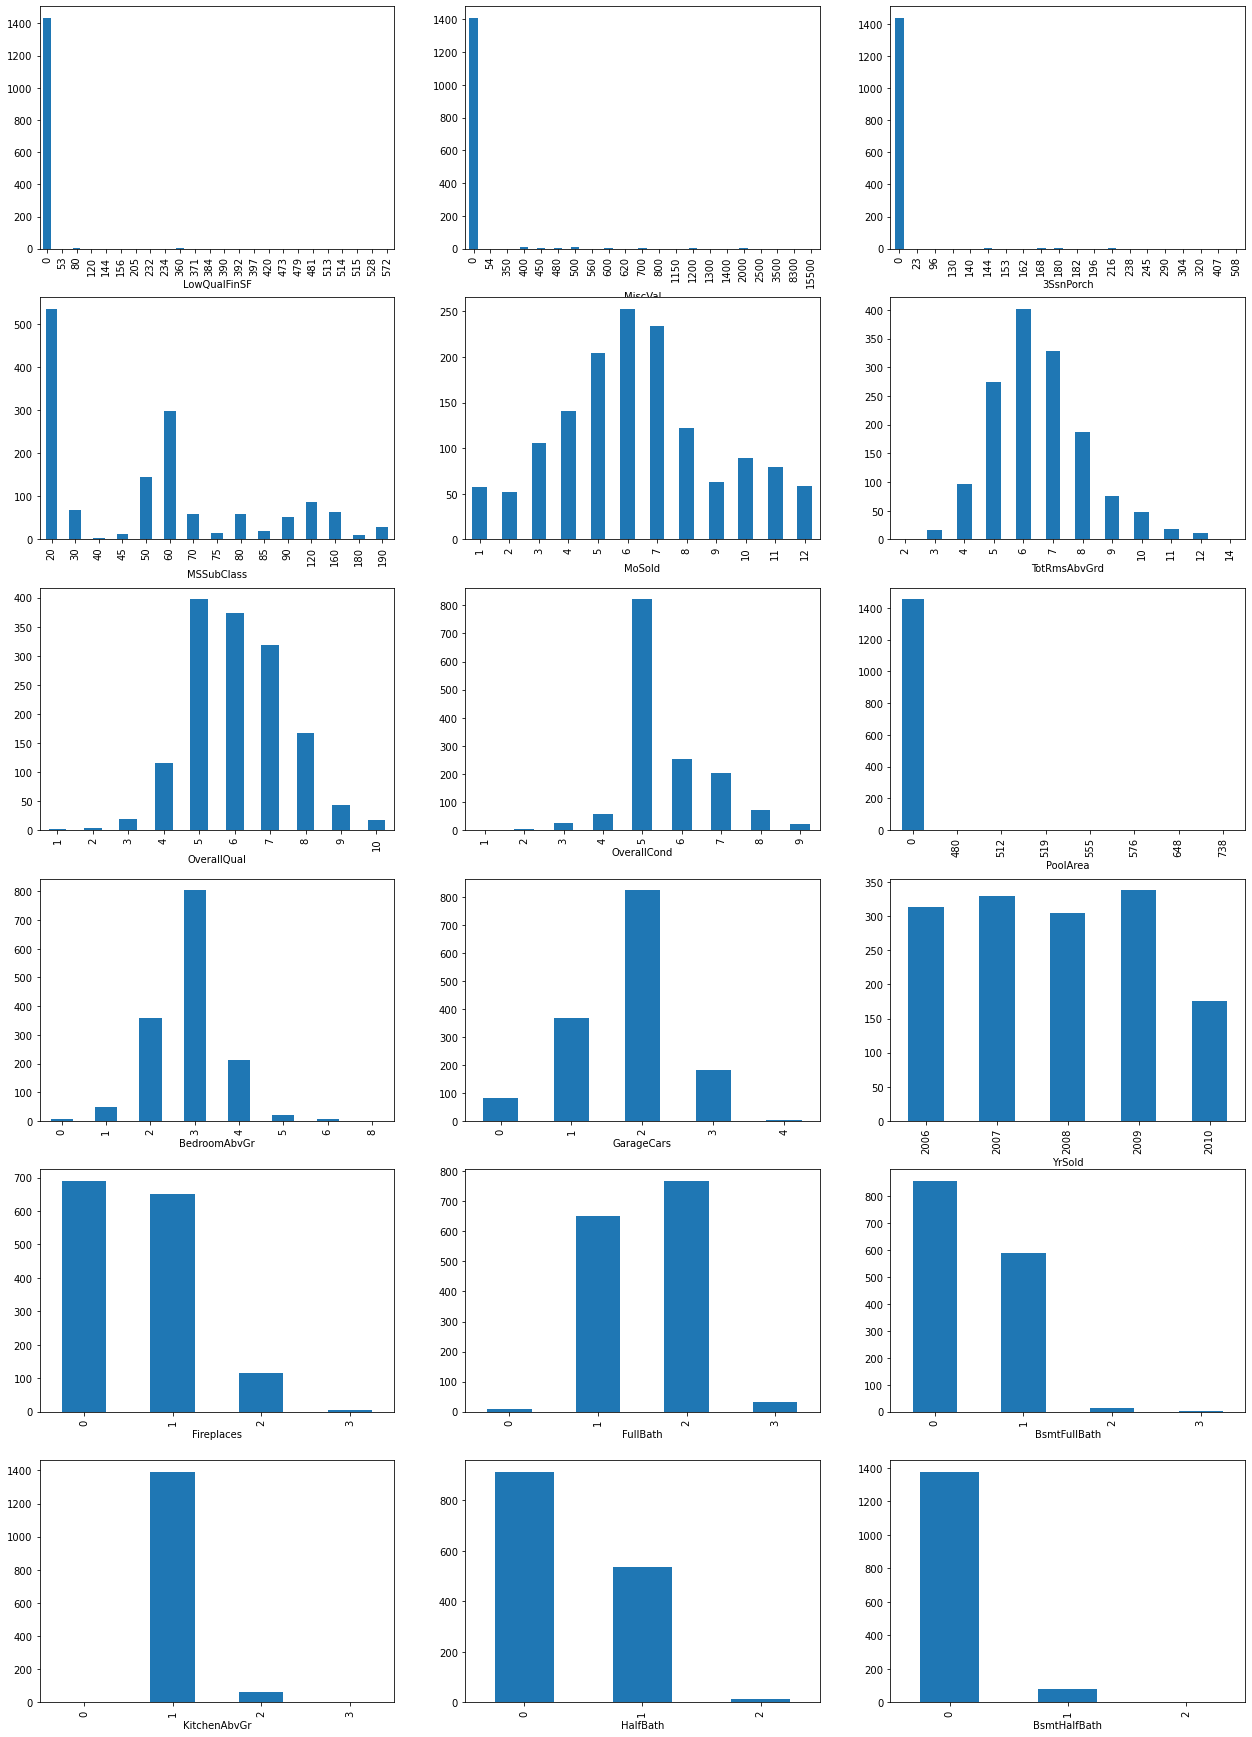

In [20]:
#Numerical columns may have categorical values
num_col =  uniqueValCount[uniqueValCount<50].sort_values(ascending=False).index
rows = 6
cols = 3
plt.figure(figsize=(cols*7.2,rows*5.2))
i=0 
for row in range(rows):
    for col in range(cols):
        index = cols*row+col
        plt.subplot(rows,cols,index+1)
        train.groupby(num_col[i]).size().plot(kind='bar',)
        i+=1

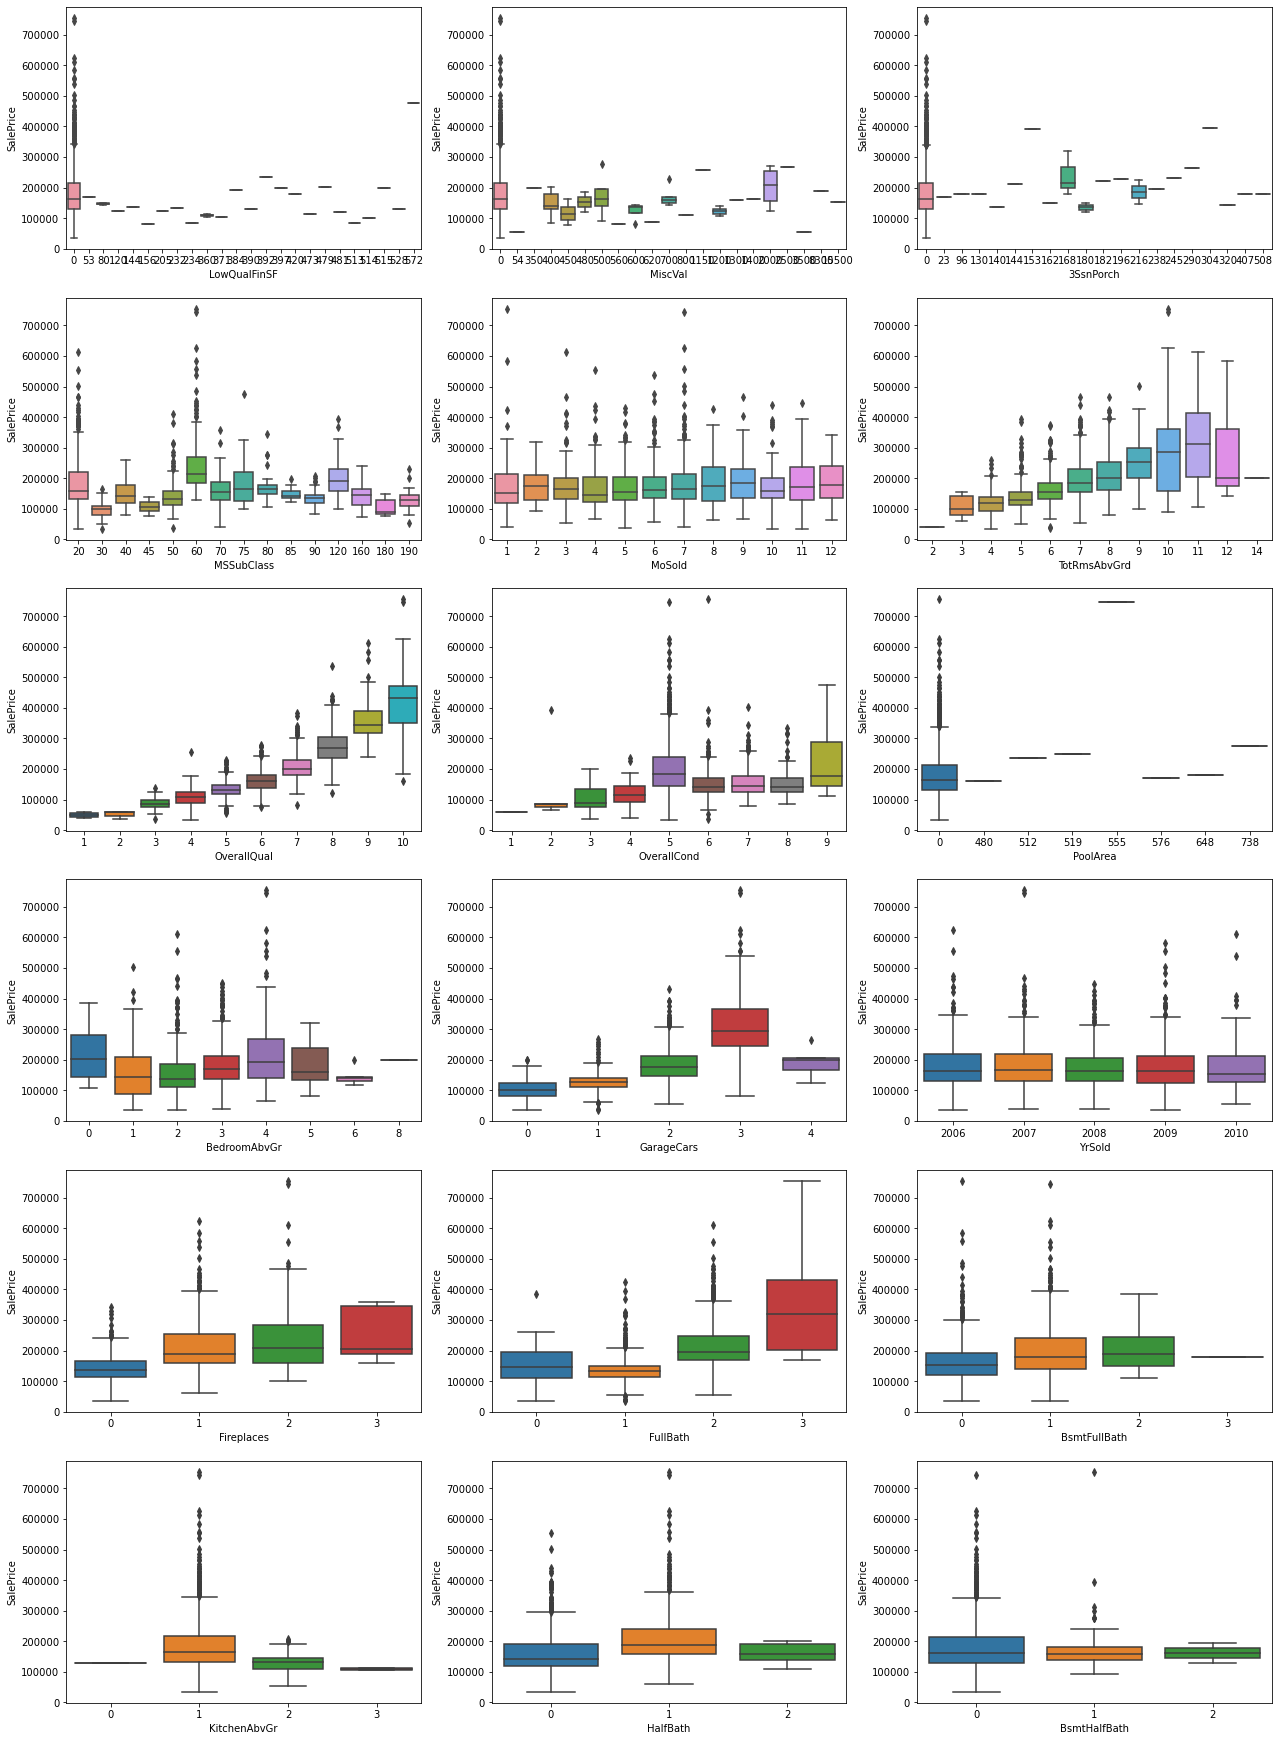

In [21]:
#Box Plot for the Columns that have Unique value count < 50

rows = 6
cols = 3
plt.figure(figsize=(cols*7.2,rows*5.2))
i=0 
for row in range(rows):
    for col in range(cols):
        index = cols*row+col
        plt.subplot(rows,cols,index+1)
        sns.boxplot(x =num_col[i] , y ='SalePrice', data =  train)
        i+=1

### From the above analysis: 
##### 'LowQualFinSF' - Low quality finish square foot area. The lower the value higher should be the price and that is not the case here. Also the data is highly imbalanced.
##### 'MiscVal' - Dollar Value of miscellaneous feature. This is also highly imbalanced since most of the houses have MiscVal value as 0.- From the above boxplot and barplot, the below can be infered.
##### '3SsnPorch' - Three season porch area in square feet. This column is also heavily imbalanced with most of the values being 0
##### 'MSSubClass' - Identifies the type of dwelling involved in the sale and there is no linear relation ship with the number of story and the price value of the house. i.e. the subclass 60's house value is not 3 times the subclass 20's house value. This is a categorical colum with no order
##### 'MoSold' : Month sold should be a categorical column rather than a numerical one. ALso there is no variation in the house price value
##### 'TotRmsAbvGrd' : Total rooms above grade seems to be a good indicator of the correlation betwwen the value o the house and the number of rooms present. And it should be numerical.
##### 'OverallQual' : Rates the overall material and finish of the house. This is also a valuable column showing strog correlation with the house price.
##### 'OverallCond' : Overall condition of the house column has some correlation witht he value of the house. For now this will be kept.
##### 'BedroomAbvGr' : Bedrooms above grade (does NOT include basement bedrooms). higher the grade better will be the room
##### 'PoolArea' : This column is also heavily imbalanced with most values with value 0 indicating non availability of the pool.
##### 'GarageCars' : Size of garage in car capacity and per the plot, this seem to have correlation wiht the house price
##### 'YrSold': This is a time column and should not be a numerical column
##### 'KitchenAbvGr' : Higly imbalanced column with mst of the values at 1 and also there is no variation with the prices
##### 'FullBath' : Keeping
##### 'BsmtFullBath': Keeping
##### 'Fireplaces' : Keeping
##### 'HalfBath' : Dropping
##### 'BsmtHalfBath' : Dropping

In [22]:
numerical_Nominal = ['MSSubClass','MoSold','YrSold']
numerical_ordinal = ['TotRmsAbvGrd','OverallQual','OverallCond','BedroomAbvGr','GarageCars','FullBath',
                     'BsmtFullBath','Fireplaces']
# These columns doeas not show much variance and are considered for droping.
numerical_drop_col = ['LowQualFinSF','MiscVal','3SsnPorch','PoolArea', 'KitchenAbvGr','HalfBath','BsmtHalfBath']

### Continues value exploration

In [23]:
continuous_columns = uniqueValCount[uniqueValCount>=50].sort_values(ascending=False).index
continuous_columns = continuous_columns.tolist() # converting series into list
continuous_columns.remove('Id')
continuous_columns

['LotArea',
 'GrLivArea',
 'BsmtUnfSF',
 '1stFlrSF',
 'TotalBsmtSF',
 'BsmtFinSF1',
 'GarageArea',
 '2ndFlrSF',
 'MasVnrArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'BsmtFinSF2',
 'EnclosedPorch',
 'YearBuilt',
 'LotFrontage',
 'GarageYrBlt',
 'ScreenPorch',
 'YearRemodAdd']

In [24]:
time_columns = ['YearBuilt','GarageYrBlt','YearRemodAdd']

In [25]:
for i in time_columns:
    continuous_columns.remove(i)
continuous_columns


['LotArea',
 'GrLivArea',
 'BsmtUnfSF',
 '1stFlrSF',
 'TotalBsmtSF',
 'BsmtFinSF1',
 'GarageArea',
 '2ndFlrSF',
 'MasVnrArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'BsmtFinSF2',
 'EnclosedPorch',
 'LotFrontage',
 'ScreenPorch']

### Identifing Outliers

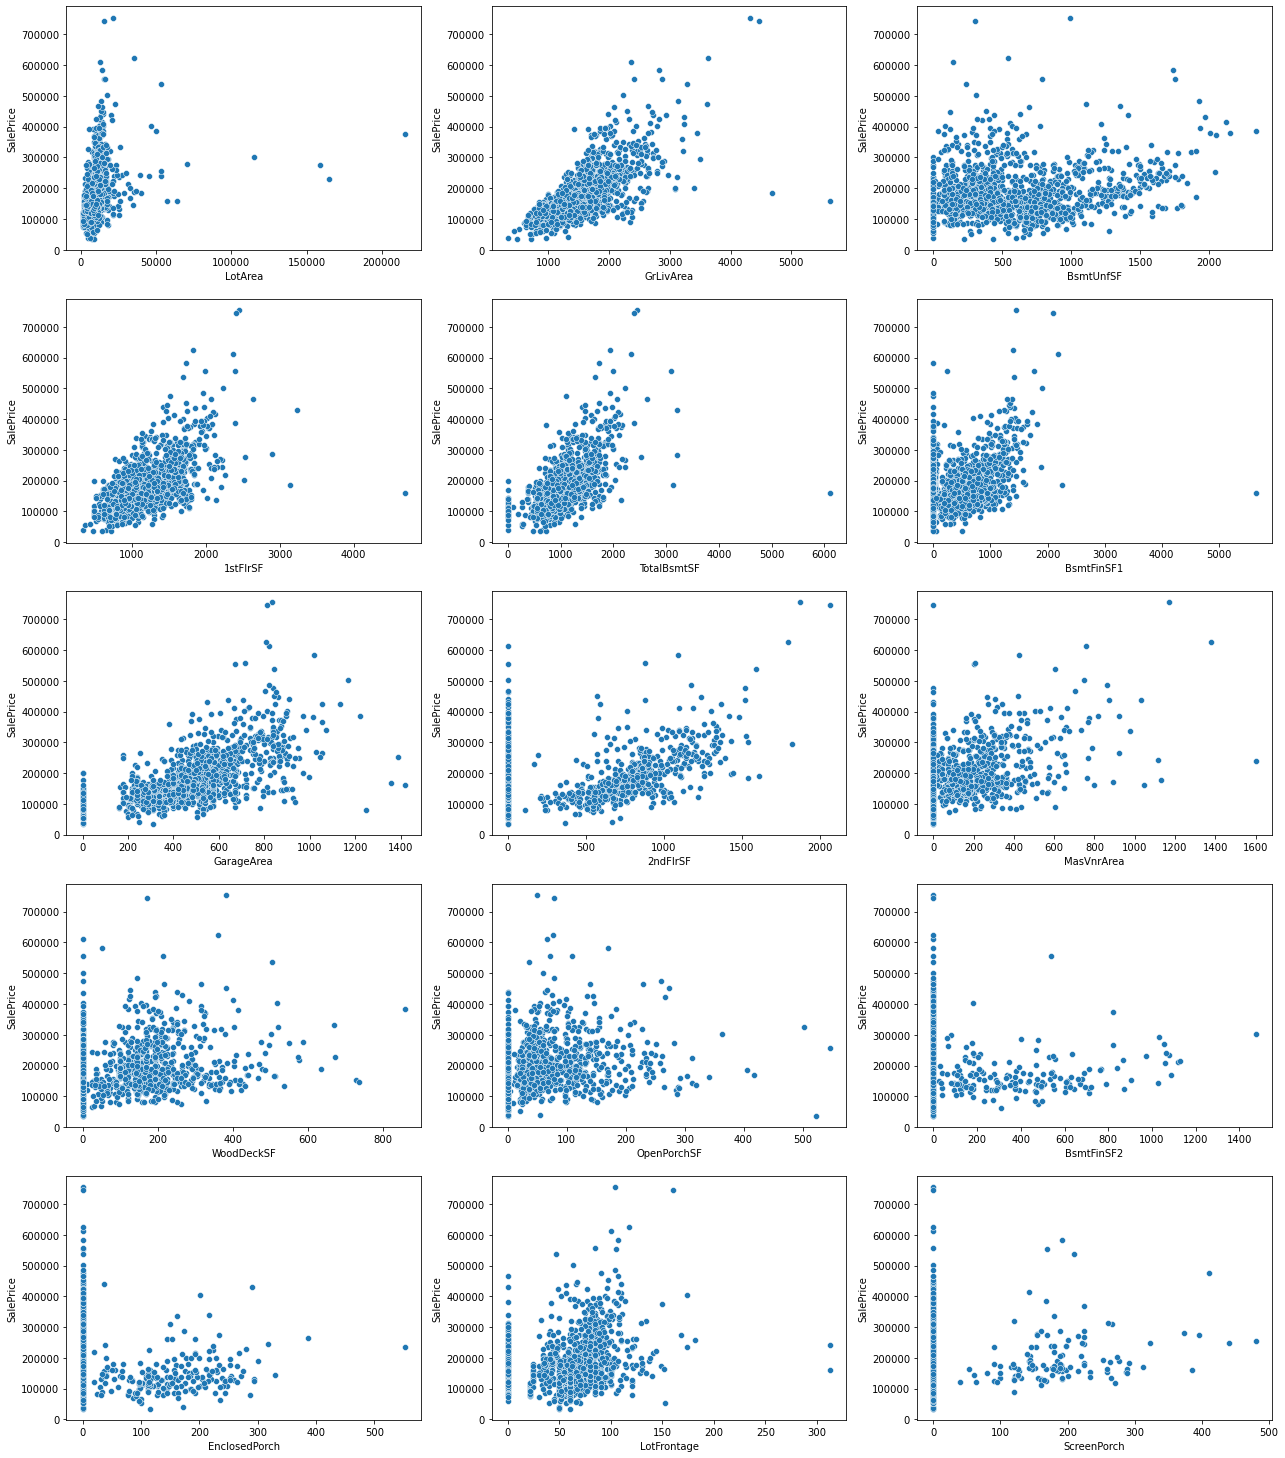

In [26]:
rows = 5
cols = 3
plt.figure(figsize=(cols*7.2,rows*5.2))
i=0 
for row in range(rows):
    for col in range(cols):
        
        index = cols*row+col
        plt.subplot(rows,cols,index+1)
        sns.scatterplot(x =continuous_columns[i] , y ='SalePrice', data =  train)        
        i +=1

#### We can see Outliers above, we'll handle these:

In [27]:
train = train[train['LotArea']<45000]
train = train[train['GrLivArea']<3500]
train = train[train['BsmtUnfSF']<2000]
train = train[train['1stFlrSF']<2500]
train = train[train['TotalBsmtSF']<2500]
train = train[train['BsmtFinSF1']<2000]
train = train[train['GarageArea']<1200]
train = train[train['MasVnrArea']<700]
train = train[train['WoodDeckSF']<600]
train = train[train['OpenPorchSF']<400]
train = train[train['BsmtFinSF2']<1200]
train = train[train['EnclosedPorch']<350]
train = train[train['LotFrontage']<200]
train = train[train['ScreenPorch']<300]
train = train[train['SalePrice']<500000]
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,None,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,None,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,FV,62.0,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,None,GLQ,410,Unf,0,811,1221,GasA,Ex,Y,SBrkr,1221,0,0,1221,1,0,2,0,2,1,Gd,6,Typ,0,Attchd,2004.0,RFn,2,400,TA,TA,Y,0,113,0,0,0,0,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,None,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,None,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,None,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500


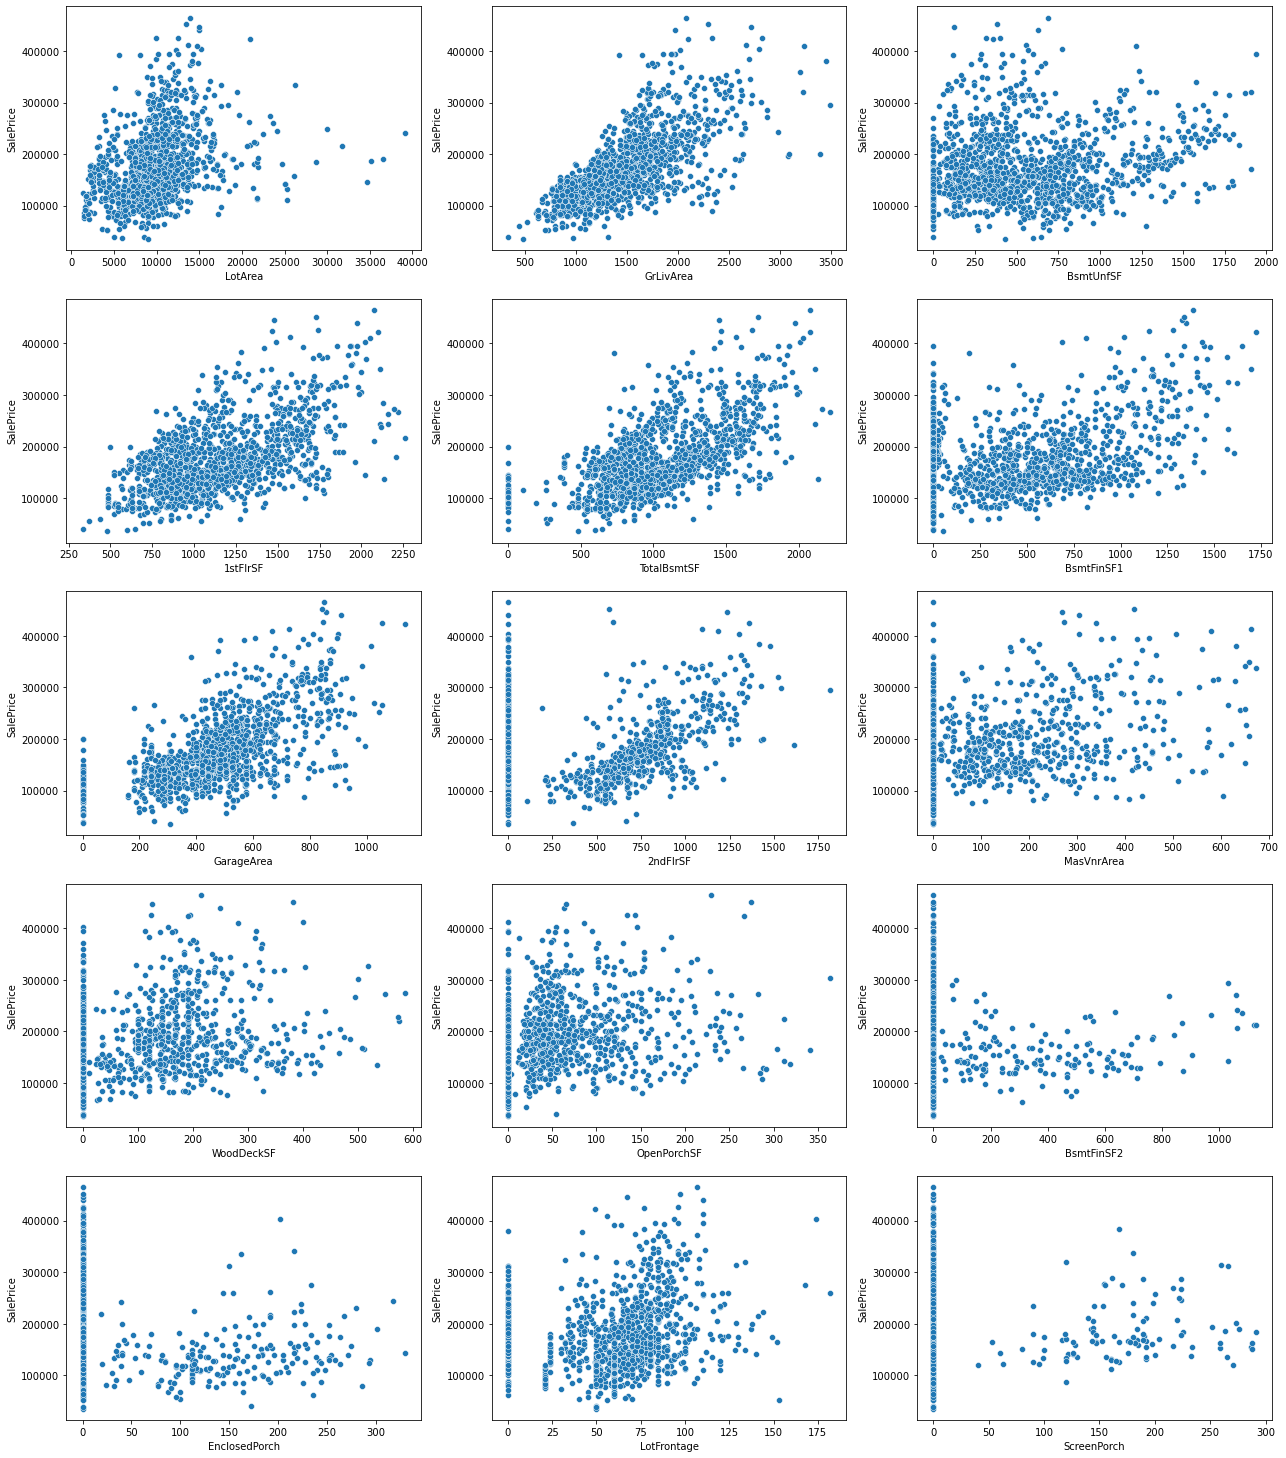

In [28]:
#Cleaned Plot

rows = 5
cols = 3
plt.figure(figsize=(cols*7.2,rows*5.2))
i=0 
for row in range(rows):
    for col in range(cols):
        
        index = cols*row+col
        plt.subplot(rows,cols,index+1)
        sns.scatterplot(x =continuous_columns[i] , y ='SalePrice', data =  train)
        i +=1

In [29]:
# Adding the SalesPrice column to the continuous column list for correalation matrix analysis
continuous_columns = ['LotArea', 'GrLivArea', 'BsmtUnfSF', '1stFlrSF', 'TotalBsmtSF', 'BsmtFinSF1', 'GarageArea', 
                      '2ndFlrSF', 'MasVnrArea', 'WoodDeckSF', 'OpenPorchSF','BsmtFinSF2', 'EnclosedPorch','LotFrontage',
                      'ScreenPorch','SalePrice']

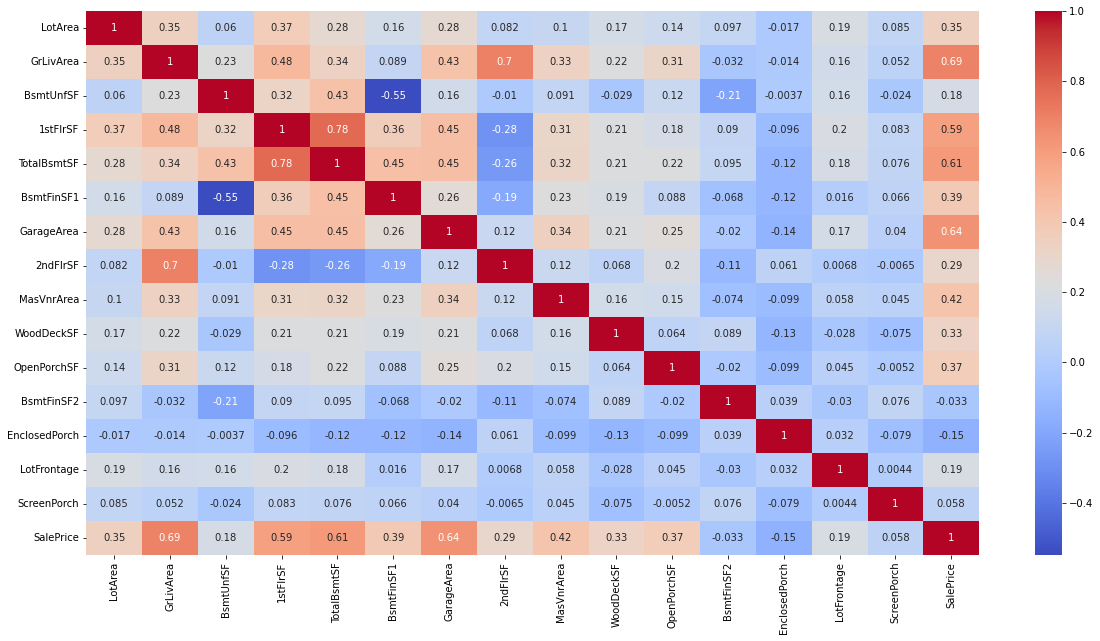

In [30]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(train[continuous_columns].corr(), cmap='coolwarm', annot=True, annot_kws={'size':10}, )
plt.show()

In [31]:
# Filter our columns with pearson's coefficient > 0.4
corr_mat = train[continuous_columns].corr()
selected_continuous_columns = corr_mat['SalePrice'][abs(corr_mat['SalePrice'])>0.4].index.tolist()
selected_continuous_columns

['GrLivArea',
 '1stFlrSF',
 'TotalBsmtSF',
 'GarageArea',
 'MasVnrArea',
 'SalePrice']

In [32]:
# Dropping the unnecessary continuous columns. Threshold pearsons coefficient value set at 0.4
droppable_continuous_columns = corr_mat['SalePrice'][abs(corr_mat['SalePrice'])<=0.4].index.tolist()
train.drop(columns=['Id','YearBuilt','GarageYrBlt','YearRemodAdd'], axis =1, inplace=True)
train.drop(columns=droppable_continuous_columns, axis =1, inplace=True)
print('The predictor size after dropping the columns', len(train.columns))

The predictor size after dropping the columns 62


In [33]:
# Dropping the NOT correlated columns. We are also dropping MoSold because it is very close to the threshold and also the plots suggested that there is no variance of the sales prices w.r.t Month sold
train = train.drop(columns= ['MoSold','YrSold'], axis = 1)

# dropping the unnecesasry columns
train = train.drop(['RoofMatl', 'Condition2', 'LowQualFinSF', 'MiscVal', 'PoolArea', 'BsmtHalfBath', '3SsnPorch'], axis=1)

In [34]:
train

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,None,GLQ,Unf,856,GasA,Ex,Y,SBrkr,856,1710,1,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,WD,Normal,208500
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,1262,1262,0,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,WD,Normal,181500
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,920,1786,1,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,WD,Normal,223500
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,None,ALQ,Unf,756,GasA,Gd,Y,SBrkr,961,1717,1,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,WD,Abnorml,140000
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,1145,2198,1,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,FV,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,1Fam,1Story,7,5,Gable,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,None,GLQ,Unf,1221,GasA,Ex,Y,SBrkr,1221,1221,1,2,0,2,1,Gd,6,Typ,0,Attchd,RFn,2,400,TA,TA,Y,WD,Normal,185000
1455,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,1Fam,2Story,6,5,Gable,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,None,Unf,Unf,953,GasA,Ex,Y,SBrkr,953,1647,0,2,1,3,1,TA,7,Typ,1,Attchd,RFn,2,460,TA,TA,Y,WD,Normal,175000
1456,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,1Fam,1Story,6,6,Gable,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,None,ALQ,Rec,1542,GasA,TA,Y,SBrkr,2073,2073,1,2,0,3,1,TA,7,Min1,2,Attchd,Unf,2,500,TA,TA,Y,WD,Normal,210000
1457,70,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,1Fam,2Story,7,9,Gable,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,None,GLQ,Unf,1152,GasA,Ex,Y,SBrkr,1188,2340,0,2,0,4,1,Gd,9,Typ,2,Attchd,RFn,1,252,TA,TA,Y,WD,Normal,266500


### Encoding data to numerical values

In [35]:
train['Street'].replace({'Pave':1,'Grvl':0}, inplace=True)
train['LotShape'].replace({'IR3':0,'IR2':1, 'IR1':2,'Reg':3},inplace=True)
train['ExterQual'].replace({'Po':1,'Fa':2,'TA':3, 'Gd':4,'Ex':5},inplace=True)
train['ExterCond'].replace({'Po':1,'Fa':2,'TA':3, 'Gd':4,'Ex':5},inplace=True)
train['BsmtQual'].replace({'No':0,'Po':1,'Fa':2,'TA':3, 'Gd':4,'Ex':5},inplace=True)
train['BsmtCond'].replace({'No':0,'Po':1,'Fa':2,'TA':3, 'Gd':4,'Ex':5},inplace=True)
train['BsmtExposure'].replace({'No':0,'None':1,'Mn':2, 'Av':3,'Gd':4},inplace=True)
train['CentralAir'].replace({'N':0,'Y':1},inplace=True)
train['KitchenQual'].replace({'Po':1,'Fa':2,'TA':3, 'Gd':4,'Ex':5},inplace=True)
train['Functional'].replace({'Sal':0,'Sev':1,'Maj2':2,'Maj1':3, 'Mod':4,'Min2':5,'Min1':6,'Typ':7},inplace=True)
train['GarageFinish'].replace({'No':0,'Unf':1, 'RFn':2,'Fin':3},inplace=True)
train['GarageQual'].replace({'No':0,'Po':1,'Fa':2,'TA':3, 'Gd':4,'Ex':5},inplace=True)
train['GarageCond'].replace({'No':0,'Po':1,'Fa':2,'TA':3, 'Gd':4,'Ex':5},inplace=True)
train['PavedDrive'].replace({'N':0,'P':1, 'Y':2},inplace=True)
train['HeatingQC'].replace({'Po':1,'Fa':2,'TA':3, 'Gd':4,'Ex':5},inplace=True)
train['BsmtFinType1'].replace({'No':0,'Unf':1,'LwQ':2,'Rec':3, 'BLQ':4,'ALQ':5,'GLQ':6},inplace=True)
train['BsmtFinType2'].replace({'No':0,'Unf':1,'LwQ':2,'Rec':3, 'BLQ':4,'ALQ':5,'GLQ':6},inplace=True)
train['MSZoning'].replace({'RL':0,'RM':1,'C (all)':2,'FV':3, 'RH':4},inplace=True)
train['LandContour'].replace({'Lvl':0,'Bnk':1,'HLS':2,'Low':3},inplace=True)
train['Utilities'].replace({'AllPub':0,'NoSeWa':1},inplace=True)
train['LotConfig'].replace({'Inside':0,'FR2':1,'Corner':2,'CulDSac':3, 'FR3':4},inplace=True)
train['LandSlope'].replace({'Gtl':0,'Mod':1,'Sev':2},inplace=True)
train['Condition1'].replace({'Norm':0,'Feedr':1,'PosN':2,'Artery':3, 'RRAe':4,'RRNn':5,'RRAn':6,'PosA':7,'RRNe':8},inplace=True)
train['BldgType'].replace({'1Fam':0,'2fmCon':1,'Duplex':2,'TwnhsE':3, 'Twnhs':4},inplace=True)
train['HouseStyle'].replace({'2Story':0,'1Story':1,'1.5Fin':2,'1.5Unf':3, 'SFoyer':4,'SLvl':5,'2.5Unf':6,'2.5Fin':7},inplace=True)
train['RoofStyle'].replace({'Gable':0,'Hip':1,'Gambrel':2,'Mansard':3, 'Flat':4,'Shed':5},inplace=True)
train['MasVnrType'].replace({'BrkFace':0,'None':1,'Stone':2,'BrkCmn':3, 'No':4},inplace=True)
train['Foundation'].replace({'PConc':0,'CBlock':1,'BrkTil':2,'Wood':3, 'Slab':4,'Stone':5},inplace=True)
train['Heating'].replace({'GasA':0,'GasW':1,'Grav':2,'Wall':3, 'OthW':4,'Floor':5},inplace=True)
train['Electrical'].replace({'SBrkr':0,'FuseF':1,'FuseA':2,'FuseP':3, 'Mix':4,'No':5},inplace=True)
train['GarageType'].replace({'Attchd':0,'Detchd':1,'BuiltIn':2,'CarPort':3, 'No':4,'Basment':5,'2Types':6},inplace=True)
train['SaleType'].replace({'WD':0,'New':1,'COD':2,'ConLD':3, 'ConLI':4,'ConLw':5,'Con':6,'Oth':7,'CWD':8},inplace=True)
train['SaleCondition'].replace({'Normal':0,'Abnorml':1,'Partial':2,'AdjLand':3, 'Alloca':4,'Family':5},inplace=True)

In [36]:
y=train['SalePrice']
X=train.drop(['Neighborhood','Exterior1st','Exterior2nd'], axis=1)
X

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,60,0,1,3,0,0,0,0,0,0,0,7,5,0,0,196.0,4,3,0,4,3,1,6,1,856,0,5,1,0,856,1710,1,2,1,3,1,4,8,7,0,0,2,2,548,3,3,2,0,0,208500
1,20,0,1,3,0,0,1,0,1,0,1,6,8,0,1,0.0,3,3,1,4,3,4,5,1,1262,0,5,1,0,1262,1262,0,2,0,3,1,3,6,7,1,0,2,2,460,3,3,2,0,0,181500
2,60,0,1,2,0,0,0,0,0,0,0,7,5,0,0,162.0,4,3,0,4,3,2,6,1,920,0,5,1,0,920,1786,1,2,1,3,1,4,6,7,1,0,2,2,608,3,3,2,0,0,223500
3,70,0,1,2,0,0,2,0,0,0,0,7,5,0,1,0.0,3,3,2,3,4,1,5,1,756,0,4,1,0,961,1717,1,1,0,3,1,4,7,7,1,1,1,3,642,3,3,2,0,1,140000
4,60,0,1,2,0,0,1,0,0,0,0,8,5,0,0,350.0,4,3,0,4,3,3,6,1,1145,0,5,1,0,1145,2198,1,2,1,4,1,4,9,7,1,0,2,3,836,3,3,2,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,3,1,3,0,0,0,0,0,0,1,7,5,0,1,0.0,4,3,0,4,3,1,6,1,1221,0,5,1,0,1221,1221,1,2,0,2,1,4,6,7,0,0,2,2,400,3,3,2,0,0,185000
1455,60,0,1,3,0,0,0,0,0,0,0,6,5,0,1,0.0,3,3,0,4,3,1,1,1,953,0,5,1,0,953,1647,0,2,1,3,1,3,7,7,1,0,2,2,460,3,3,2,0,0,175000
1456,20,0,1,3,0,0,0,0,0,0,1,6,6,0,2,119.0,3,3,1,4,3,1,5,3,1542,0,3,1,0,2073,2073,1,2,0,3,1,3,7,6,2,0,1,2,500,3,3,2,0,0,210000
1457,70,0,1,3,0,0,0,0,0,0,0,7,9,0,1,0.0,5,4,5,3,4,1,6,1,1152,0,5,1,0,1188,2340,0,2,0,4,1,4,9,7,2,0,2,1,252,3,3,2,0,0,266500


In [37]:
X=X.drop(['SalePrice'],axis=1)


## Building a Model

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2 , random_state=1)

In [40]:
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
linear_regression.score(X_test,y_test)


0.8406634428069794

In [41]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.89651043, 0.8971273 , 0.86144918, 0.85669946, 0.86067743])

In [42]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def find_best_model_using_grid_search(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores =[]
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])    
    
find_best_model_using_grid_search(X,y)

C:\Users\deepaksingh\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\deepaksingh\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipel

C:\Users\deepaksingh\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


,model,best_score,best_params
0,linear_regression,0.874493,{'normalize': True}
1,lasso,0.874528,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.742474,"{'criterion': 'mse', 'splitter': 'best'}"


Model Performance On Test Data


In [43]:
X.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [44]:
test_null = pd.DataFrame(test.isnull().sum()).rename(columns={0:'Total'})
test_null['NaN %'] = round(100*(test_null['Total']/test.shape[0]),2)
Nulls_test = test_null[test_null['Total']>0].sort_values('NaN %', ascending=False)
Nulls_test


,Total,NaN %
PoolQC,1456,99.79
MiscFeature,1408,96.50
Alley,1352,92.67
Fence,1169,80.12
FireplaceQu,730,50.03
LotFrontage,227,15.56
GarageCond,78,5.35
GarageYrBlt,78,5.35
GarageQual,78,5.35
GarageFinish,78,5.35


In [45]:
 
for col in NaN_Objects:
    test[col].fillna(value='No', inplace=True)
    
for col1 in Nan_Int:
    test[col1].fillna(value=0, inplace=True)
    
    
#'BsmtExposure' which already has a 'No' meaning no exposure for the basement. 
#To maintain consistency, we will first change the No to None for this column and then impute the NaN's with 'No'.

test.loc[test['BsmtExposure']=='No','BsmtExposure'] = 'None'
test['BsmtExposure'].fillna(value='No', inplace=True)

#We can see that out of 1460 houses only 190 houses have different garage built year. 
#We can simply replace the 'YearBuilt' value in the Garagebuilt for the blank/null values.
test.loc[test['GarageYrBlt']==0,'GarageYrBlt'] = test[test['GarageYrBlt']==0]['YearBuilt']
test[test['GarageYrBlt']==0]['GarageYrBlt'] 

    
test=test[['Id', 'MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition']]

test=test.dropna()


test['Street'].replace({'Pave':1,'Grvl':0}, inplace=True)
test['LotShape'].replace({'IR3':0,'IR2':1, 'IR1':2,'Reg':3},inplace=True)
test['ExterQual'].replace({'Po':1,'Fa':2,'TA':3, 'Gd':4,'Ex':5},inplace=True)
test['ExterCond'].replace({'Po':1,'Fa':2,'TA':3, 'Gd':4,'Ex':5},inplace=True)
test['BsmtQual'].replace({'No':0,'Po':1,'Fa':2,'TA':3, 'Gd':4,'Ex':5},inplace=True)
test['BsmtCond'].replace({'No':0,'Po':1,'Fa':2,'TA':3, 'Gd':4,'Ex':5},inplace=True)
test['BsmtExposure'].replace({'No':0,'None':1,'Mn':2, 'Av':3,'Gd':4},inplace=True)
test['CentralAir'].replace({'N':0,'Y':1},inplace=True)
test['KitchenQual'].replace({'Po':1,'Fa':2,'TA':3, 'Gd':4,'Ex':5},inplace=True)
test['Functional'].replace({'Sal':0,'Sev':1,'Maj2':2,'Maj1':3, 'Mod':4,'Min2':5,'Min1':6,'Typ':7},inplace=True)
test['GarageFinish'].replace({'No':0,'Unf':1, 'RFn':2,'Fin':3},inplace=True)
test['GarageQual'].replace({'No':0,'Po':1,'Fa':2,'TA':3, 'Gd':4,'Ex':5},inplace=True)
test['GarageCond'].replace({'No':0,'Po':1,'Fa':2,'TA':3, 'Gd':4,'Ex':5},inplace=True)
test['PavedDrive'].replace({'N':0,'P':1, 'Y':2},inplace=True)
test['HeatingQC'].replace({'Po':1,'Fa':2,'TA':3, 'Gd':4,'Ex':5},inplace=True)
test['BsmtFinType1'].replace({'No':0,'Unf':1,'LwQ':2,'Rec':3, 'BLQ':4,'ALQ':5,'GLQ':6},inplace=True)
test['BsmtFinType2'].replace({'No':0,'Unf':1,'LwQ':2,'Rec':3, 'BLQ':4,'ALQ':5,'GLQ':6},inplace=True)
test['MSZoning'].replace({'RL':0,'RM':1,'C (all)':2,'FV':3, 'RH':4},inplace=True)
test['LandContour'].replace({'Lvl':0,'Bnk':1,'HLS':2,'Low':3},inplace=True)
test['Utilities'].replace({'AllPub':0,'NoSeWa':1},inplace=True)
test['LotConfig'].replace({'Inside':0,'FR2':1,'Corner':2,'CulDSac':3, 'FR3':4},inplace=True)
test['LandSlope'].replace({'Gtl':0,'Mod':1,'Sev':2},inplace=True)
test['Condition1'].replace({'Norm':0,'Feedr':1,'PosN':2,'Artery':3, 'RRAe':4,'RRNn':5,'RRAn':6,'PosA':7,'RRNe':8},inplace=True)
test['BldgType'].replace({'1Fam':0,'2fmCon':1,'Duplex':2,'TwnhsE':3, 'Twnhs':4},inplace=True)
test['HouseStyle'].replace({'2Story':0,'1Story':1,'1.5Fin':2,'1.5Unf':3, 'SFoyer':4,'SLvl':5,'2.5Unf':6,'2.5Fin':7},inplace=True)
test['RoofStyle'].replace({'Gable':0,'Hip':1,'Gambrel':2,'Mansard':3, 'Flat':4,'Shed':5},inplace=True)
test['MasVnrType'].replace({'BrkFace':0,'None':1,'Stone':2,'BrkCmn':3, 'No':4},inplace=True)
test['Foundation'].replace({'PConc':0,'CBlock':1,'BrkTil':2,'Wood':3, 'Slab':4,'Stone':5},inplace=True)
test['Heating'].replace({'GasA':0,'GasW':1,'Grav':2,'Wall':3, 'OthW':4,'Floor':5},inplace=True)
test['Electrical'].replace({'SBrkr':0,'FuseF':1,'FuseA':2,'FuseP':3, 'Mix':4,'No':5},inplace=True)
test['GarageType'].replace({'Attchd':0,'Detchd':1,'BuiltIn':2,'CarPort':3, 'No':4,'Basment':5,'2Types':6},inplace=True)
test['SaleType'].replace({'WD':0,'New':1,'COD':2,'ConLD':3, 'ConLI':4,'ConLw':5,'Con':6,'Oth':7,'CWD':8},inplace=True)
test['SaleCondition'].replace({'Normal':0,'Abnorml':1,'Partial':2,'AdjLand':3, 'Alloca':4,'Family':5},inplace=True)

test

,Id,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1461,20,4,1,3,0,0,0,0,1,0,1,5,6,0,1,0.0,3,3,1,3,3,1,3,2,882.0,0,3,1,0,896,896,0.0,1,0,2,1,3,5,7,0,0,1,1.0,730.0,3,3,2,0,0
1,1462,20,0,1,2,0,0,2,0,0,0,1,6,6,1,0,108.0,3,3,1,3,3,1,5,1,1329.0,0,3,1,0,1329,1329,0.0,1,1,3,1,4,6,7,0,0,1,1.0,312.0,3,3,2,0,0
2,1463,60,0,1,2,0,0,0,0,0,0,0,5,5,0,1,0.0,3,3,0,4,3,1,6,1,928.0,0,4,1,0,928,1629,0.0,2,1,3,1,3,6,7,1,0,3,2.0,482.0,3,3,2,0,0
3,1464,60,0,1,2,0,0,0,0,0,0,0,6,6,0,0,20.0,3,3,0,3,3,1,6,1,926.0,0,5,1,0,926,1604,0.0,2,1,3,1,4,7,7,1,0,3,2.0,470.0,3,3,2,0,0
4,1465,120,0,1,2,2,0,0,0,0,3,1,8,5,0,1,0.0,4,3,0,4,3,1,5,1,1280.0,0,5,1,0,1280,1280,0.0,2,0,2,1,4,5,7,0,0,2,2.0,506.0,3,3,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1,1,3,0,0,0,0,0,4,0,4,7,0,1,0.0,3,3,1,3,3,1,1,1,546.0,0,4,1,0,546,1092,0.0,1,1,3,1,3,5,7,0,4,0,0.0,0.0,0,0,2,0,0
1455,2916,160,1,1,3,0,0,0,0,0,3,0,4,5,0,1,0.0,3,3,1,3,3,1,3,1,546.0,0,3,1,0,546,1092,0.0,1,1,3,1,3,6,7,0,3,1,1.0,286.0,3,3,2,0,1
1456,2917,20,0,1,3,0,0,0,0,0,0,1,5,7,0,1,0.0,3,3,1,3,3,1,5,1,1224.0,0,5,1,0,1224,1224,1.0,1,0,4,1,3,7,7,1,1,1,2.0,576.0,3,3,2,0,1
1457,2918,85,0,1,3,0,0,0,0,0,0,4,5,5,0,1,0.0,3,3,0,4,3,3,6,1,912.0,0,3,1,0,970,970,0.0,1,0,3,1,3,6,7,0,4,0,0.0,0.0,0,0,2,0,0


In [46]:
test_pred = test.drop(['Id'], axis=1)
final_prediction = linear_regression.predict(test_pred)
final_pred = pd.DataFrame(final_prediction)

In [47]:
sub = pd.DataFrame()
sub['Id']= test['Id']
sub['SalePrice'] = final_pred
sub.to_csv('HousPricePrediction.csv',index=False)